In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import datasets

In [2]:
A = pd.read_csv('C://Users//user//Desktop//Bank-full.csv')
A.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()

A['job']=le.fit_transform(A['job'])
A['marital']=le.fit_transform(A['marital'])
A['education']=le.fit_transform(A['education'])
A['default']=le.fit_transform(A['default'])
A['housing']=le.fit_transform(A['housing'])
A['loan']=le.fit_transform(A['loan'])
A['contact']=le.fit_transform(A['contact'])
A['month']=le.fit_transform(A['month'])
A['poutcome'] = le.fit_transform(A['poutcome'])
A

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


In [4]:
X = A.drop(labels=['y'],axis=1).values 
y = A['y']

In [27]:
from sklearn.cluster import AgglomerativeClustering
Hierarchicalmodel=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [28]:
y_pred = Hierarchicalmodel.fit_predict(X)
y_true = A.y


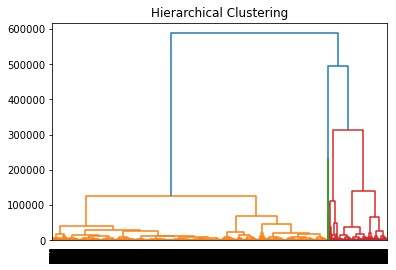

In [7]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(X,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

In [29]:
from sklearn.metrics import calinski_harabasz_score
score=calinski_harabasz_score(X,Hierarchicalmodel.labels_)
print(score)

81969.05759596947


In [30]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [31]:
purity_score(y_true, y_pred)

0.8830151954170445